# Titanic: Machine Learning from Disaster
*Kaggle's tutorials, rewritten to retain only essential code.*

Next: More exploratory data analysis to support a better model.

Issues are flagged as <code>Issue:</code>.
Questions are flagged as <code>Q:</code>.

### 0.1 Import packages

In [443]:
import pandas as pd
import numpy as np
import pylab as P
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cross_validation
import csv
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [444]:
# Import models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

### 0.2 Import data

In [445]:
df = pd.read_csv('kaggle-data/titanic/train.csv', header=0)

In [446]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Notice there are fewer than 891 entries in the Age, Cabin and Embarked columns. We will investigate these columns when we move on to *Data Munging (Cleaning)*.

# Exploratory Data Analysis

### 1.1 Transform columns that are non-numerical into columns that are numerical

#### 1.1.1 Sex

In [448]:
# Make Gender into values of 0s and 1s
def sex_to_num(df=df):
    df['Gender'] = df['Sex'].map ( {'female': 0, 
                                    'male': 1} ).astype(int)
sex_to_num()
df[['Gender', 'Sex']].head()

,Gender,Sex
0,1,male
1,0,female
2,0,female
3,0,female
4,1,male


#### 1.1.2 Embarked

In [449]:
# Make new column ``PortEmbarked`` with values of 0s and 1s 
# to represent values of ``Embarked``
def embarked_to_num(df=df):
    df['PortEmbarked'] = df['Embarked'].dropna().map( {'C': 0, 
                                                       'Q': 1, 
                                                       'S': 2} ).astype(int)
embarked_to_num()
df[['Embarked', 'PortEmbarked']].head()

# Issue: They're still not displayed as ints?

,Embarked,PortEmbarked
0,S,2.0
1,C,0.0
2,S,2.0
3,S,2.0
4,S,2.0


### 1.2 Investigate missing values: Age, PortEmbarked and Cabin
By inspection, it seems most passengers above the age of 60 are men and that most of them did not survive the sinking of the Titanic.

### 1.2.1 PortEmbarked

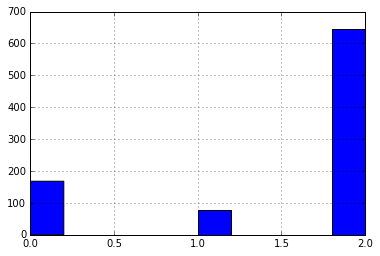

In [450]:
df['PortEmbarked'].hist()

**Assumption**: Most people (over three quarters) embarked at Port 2. So we'll just suppose these two passengers embarked at Port 2.

In [451]:
df['PortEmbarked'][61] = 2
df['PortEmbarked'][829] = 2

/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### 1.2.2 Dealing with the missing values of Age
Reason: Most ML will need a complete set of values in the ``Age`` column to use it.
By filling these missing values with guesses, we will be introducing some noise into the model, but if we can keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of Age might still make a better model than before. 
Q: Why is it better to guess values than to remove these rows altogether?

Consider: Mean, median. Median may be more appropriate since the Age histogram seemed positively skewed. Choosing the median would reduce the influence of a few rare 70- and 80-year-olds.

We decide to **use the median age for each gender in each passenger class**.

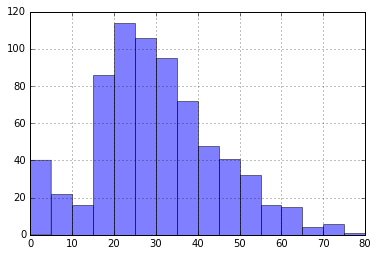

In [452]:
# Plot specific histogram. Removed nulls. Alpha is opacity.
df['Age'].dropna().hist(bins=16, range=(0,80), alpha=0.5)
P.show()

In [453]:
# Find median ages for each gender in each passenger class
median_ages = np.zeros((2,3))

for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j] = df[ (df['Gender'] == i) & \
                               (df['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [454]:
# Create new column AgeFill to put values into. 
# This retains the state of the original data.
def age_fill(df=df):
    df['AgeFill'] = df['Age']

    # Put our estimates into NaN rows of new column AgeFill.
    # df.loc is a purely label-location based indexer for selection by label.
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),\
                     'AgeFill'] = median_ages[i,j]
age_fill()
df[ df['Age'].isnull()][['Age', 'AgeFill', 'Gender', 'Pclass']].head(10)

,Age,AgeFill,Gender,Pclass
5,NaN,25.0,1,3
17,NaN,30.0,1,2
19,NaN,21.5,0,3
26,NaN,25.0,1,3
28,NaN,21.5,0,3
29,NaN,25.0,1,3
31,NaN,35.0,0,1
32,NaN,21.5,0,3
36,NaN,25.0,1,3
42,NaN,25.0,1,3


In [455]:
# Create a feature that records whether the Age was originally missing
def age_is_null(df=df):
    df['AgeIsNull'] = pd.isnull(df['Age']).astype(int)
age_is_null()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,PortEmbarked,AgeFill,AgeIsNull
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2.0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2.0,35.0,0


### 1.2.3 Cabin

In [456]:
# Fix

def cabin_type(df=df):
    df['CabinType'] = 1
    for i in range(len(df['Cabin'])):
        datapoint = df['Cabin'][i]
        str_obj = type('a')
        if type(datapoint) == str_obj:
            df['CabinType'][i] = datapoint[0]
        elif np.isnan(float(datapoint)):
            df['CabinType'][i] = 0

In [457]:
def cabin_type_to_num(df=df):
    df['CabinNum'] = df['CabinType'].map( {0: 0, 
                                                   'A': 1,
                                                   'B': 2,
                                                   'C': 3,
                                                   'D': 4,
                                                   'E': 5,
                                                   'F': 6,
                                                   'G': 7,
                                                   'T': 8,} ).astype(int)

In [458]:
# Slow
def cabin_to_num(df=df):
    cabin_type(df=df)
    cabin_type_to_num(df=df)
cabin_to_num()

/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [459]:
# Find set of cabin values
def set_of_cabin_types(df=df):
    cabin_values = set()
    for i in range(len(df['CabinType'])):
        cabin_values.add(df['CabinType'][i])
    print(cabin_values)

## 2. Feature Engineering

In [425]:
# FamilySize
def family_size(df=df):
    df['FamilySize'] = df['SibSp'] + df['Parch']

def is_family(df=df):
    
def age_class_product(df=df):
    df['Age*Class'] = df['AgeFill'] * df['Pclass']

def add_features(df=df):
    family_size(df)
    age_class_product(df)

add_features()

Todo: Pull out more information from the ``Name`` column, e.g. the honorary or pedestrian title of the men.

## 2b. Drop columns

### Drop columns we're not going to use

In [416]:
# This doesn't work for some reason. ISSUE
def drop_transferred(df=df):
    # Drop columns we've transferred
    df = df.drop(['Embarked', 'Sex', 'Age', 'Cabin', 'CabinType'], axis=1)
drop_transferred()

In [ ]:
df.info()

In [417]:
# ISSUE: This doesn't work either.
# Drop the columns we don't know what to do with yet
# I.e. in Object form and hard to interpret
def drop_not_handled(df=df):
    df = df.drop(['Name', 'Ticket'],axis=1)
drop_not_handled()

In [418]:
df = df.drop(['Embarked', 'Sex', 'Age', 'Cabin', 'CabinType'], axis=1)
df = df.drop(['Name', 'Ticket'],axis=1)

### Check that there are no NaNs or infinities in input

In [419]:
def test_for_nans_infinities(data):
    """Any NaNs or infinities in data? 
    Want this to return False, False.
    """
    print('Any NaNs in ', '? ', np.any(np.isnan(data)))
    print('Any infinities in ', '? ', not(np.any(np.isfinite(data))))

In [421]:
test_for_nans_infinities(df.ix[:,'Survived':])

Any NaNs in  ?  False
Any infinities in  ?  False


In [422]:
def find_nans(dataframe):
    """Print rows will cells that have NaNs"""
    for i in range(0,len(dataframe)):
        for j in range(0,len(dataframe.iloc[0])):
            if np.isnan(dataframe.iloc[i][j]):
                print(dataframe[i:i+1])

In [423]:
find_nans(df)

In [424]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,PortEmbarked,AgeFill,AgeIsNull,CabinNum
0,1,0,3,1,0,7.2500,1,2.0,22.0,0,0
1,2,1,1,1,0,71.2833,0,0.0,38.0,0,3
2,3,1,3,0,0,7.9250,0,2.0,26.0,0,0
3,4,1,1,1,0,53.1000,0,2.0,35.0,0,3
4,5,0,3,0,0,8.0500,1,2.0,35.0,0,0


# Evaluating estimator performance

In [426]:
# Split df into data and target

data = df.ix[:,'Pclass':].values
target = df['Survived'].values

# Split data randomly into training and test sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
data, target, test_size=0.2)

print("Training sets: ", X_train.shape, y_train.shape)
print("Test sets: ",X_test.shape, y_test.shape)

Training sets:  (712, 9) (712,)
Test sets:  (179, 9) (179,)


In [427]:
# Fit to model and train model
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.83798882681564246

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Gender          891 non-null int64
PortEmbarked    891 non-null float64
AgeFill         891 non-null float64
AgeIsNull       891 non-null int64
CabinNum        891 non-null int64
dtypes: float64(3), int64(8)
memory usage: 76.6 KB


# Preparing Output for Kaggle
### Transform Test data

In [436]:
# Import test data
test_df = pd.read_csv('kaggle-data/titanic/test.csv')

# Prepare the test data as we did the training data.
# A good summary of the actions we took on the training data.

# Map ``Sex`` and ``Embarked`` to numerical values
sex_to_num(df=test_df)
embarked_to_num(df=test_df)
age_fill(df=test_df)
age_is_null(df=test_df)
cabin_to_num(df=test_df)

add_features(test_df)

test_df = test_df.drop(['Embarked', 'Sex', 'Age', 'Cabin', 'CabinType'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'],axis=1)

/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [430]:
print(test_df.shape)

(418, 12)


### Correct for NaNs in test data

In [437]:
find_nans(test_df)

     PassengerId  Pclass  SibSp  Parch  Fare  Gender  PortEmbarked  AgeFill  \
152         1044       3      0      0   NaN       1             2     60.5   

     AgeIsNull  CabinNum  
152          0         0  


In [438]:
# Fill in Fare value
# Estimate Fare value based on median for Pclass and Port.
# Likely to be inaccurate because of variations in fare even among 
# people in the same Pclass embarking at the same port.

# Visualise
# test_df[(test_df['PortEmbarked'] == 2) & (test_df['Pclass'] == 3)]

# Median fare for Pclass = 3, PortEmbarked = 2
median_fare = np.median(test_df[(test_df['PortEmbarked'] == 2) & (test_df['Pclass'] == 3)]['Fare'].dropna())
median_fare


8.0500000000000007

**Note that I used the median of the test data. I should probably use the median of the training data.**

In [439]:
test_df['Fare'][152] = median_fare

/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [440]:
# Transform data into array
test_data = test_df.values

# Collect Passenger Ids for output file
ids = test_df['PassengerId'].values

# Drop PassengerId column
test_data = test_data[:,1::]
test_data

array([[  3. ,   0. ,   0. , ...,  34.5,   0. ,   0. ],
       [  3. ,   1. ,   0. , ...,  47. ,   0. ,   0. ],
       [  2. ,   0. ,   0. , ...,  62. ,   0. ,   0. ],
       ..., 
       [  3. ,   0. ,   0. , ...,  38.5,   0. ,   0. ],
       [  3. ,   0. ,   0. , ...,  25. ,   1. ,   0. ],
       [  3. ,   1. ,   1. , ...,  25. ,   1. ,   0. ]])

## Train model and predict

In [441]:
output = clf.predict(test_data).astype(int)
output

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

### Write output to file

In [442]:
predictions_file = open("submissions/titanic/random-forest-drop-nas.csv", "w")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()